# **总测试**
## **测试一**

实现一个机器学习工作流程，从糖尿病数据集的加载和预处理开始，然后使用线性回归模型进行训练。训练过程中记录训练和验证集的R²评分，并通过绘制学习曲线来观察模型性能的变化趋势。

### **选定的算法**
- **DatasetLoader （Basic.DataPart.DatasetLoader）**
    - 用于加载数据集。
    - 提供多种数据集加载方法，如 load_boston、load_diabetes 等。
    - 负责从外部来源获取数据，并返回特征矩阵和目标值。

- **DataPreprocessor （Basic.DataPart.DataPreprocessor）**
    - 用于数据预处理。
    - 支持以下功能：
        - 缺失值处理（如均值填充或删除）。
        - 数据标准化（Z-Score 标准化）。
        - 数据集划分为训练集和测试集。
        - 其他处理功能（如过采样、欠采样）。

- **LinearRegression （Models.LinearRegression）**
    - 自定义线性回归模型类。
    - 支持正则化（L1 和 L2）和多种优化算法（SGD、Momentum、Adam）。
    - 提供模型训练（fit）和预测（predict）功能，并使用 R² 评估模型性能。

- **plot （Tool.Visualization.LearningCurve）**
    - 用于绘制学习曲线。
    - 接受训练分数和验证分数，直观展示模型性能随训练过程的变化。

### **1. 加载和预处理数据：**
- DatasetLoader 类用于加载数据集，这里加载的是糖尿病数据集。
- DataPreprocessor 类用于处理数据，包括处理缺失值和标准化数据。
- 最后，将数据集划分为训练集和验证集。

### **2. 定义模型：**
- 使用 LinearRegression 类定义了一个线性回归模型，并设置了一些超参数，如学习率、最大迭代次数、优化器、正则化类型和参数等。

### **3. 训练模型并记录评分：**
- 使用一个循环进行模型训练，并在每个训练周期（epoch）后，对训练集和验证集进行评分（R²值）。
- 将每个周期的评分结果记录在 train_scores 和 val_scores 列表中，并每50个周期输出一次当前的评分结果。

### **4. 绘制学习曲线：**
- 最后，调用 plot 函数绘制训练得分和验证得分的学习曲线，以观察模型性能的变化趋势。

Epoch 50: Train Score = 0.7430, Val Score = 0.6277
Epoch 100: Train Score = 0.7430, Val Score = 0.6277
Epoch 150: Train Score = 0.7430, Val Score = 0.6277
Epoch 200: Train Score = 0.7430, Val Score = 0.6277
Epoch 250: Train Score = 0.7431, Val Score = 0.6280
Epoch 300: Train Score = 0.7430, Val Score = 0.6278
Epoch 350: Train Score = 0.7430, Val Score = 0.6278
Epoch 400: Train Score = 0.7430, Val Score = 0.6278
Epoch 450: Train Score = 0.7430, Val Score = 0.6277
Epoch 500: Train Score = 0.7430, Val Score = 0.6278


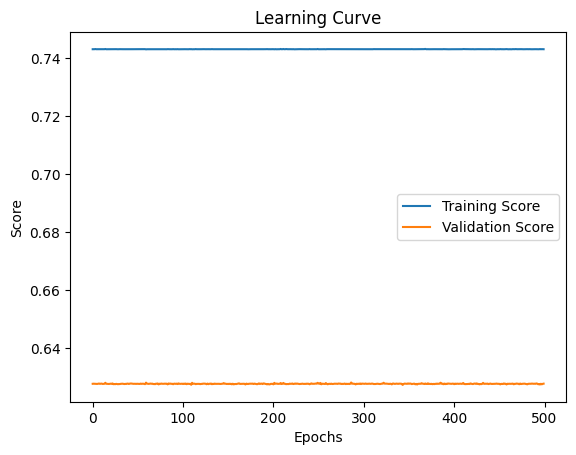

In [3]:
from Basic.DataPart.DatasetLoader import DatasetLoader
from Basic.DataPart.DataPreprocessor import DataPreprocessor
from Models.LinearRegression import LinearRegression
from Tool.Visualization.LearningCurve import plot

# Step 1: Load and Preprocess Data
loader = DatasetLoader()
X, y = loader.load('diabetes')  # 加载糖尿病数据集

preprocessor = DataPreprocessor()
X = preprocessor.handle_missing_values(X, strategy='mean')  # 处理缺失值
X = preprocessor.standardize(X)  # 标准化数据
X_train, X_val, y_train, y_val = preprocessor.train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define Model
model = LinearRegression(learning_rate=0.01, max_iterations=500, optimizer='adam', regularization='l2', lambda_param=0.1)

# Step 3: Train Model and Record Scores
train_scores = []
val_scores = []

for epoch in range(1, model.max_iterations + 1):
    # Train on training data
    model.fit(X_train, y_train, k_folds=5)  # Single epoch training

    # Evaluate on training and validation data
    train_score = model.score(X_train, y_train)  # R² Score for training data
    val_score = model.score(X_val, y_val)  # R² Score for validation data

    train_scores.append(train_score)
    val_scores.append(val_score)

    # Print progress
    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Train Score = {train_score:.4f}, Val Score = {val_score:.4f}")

# Step 4: Plot Learning Curve
plot(train_scores, val_scores)

### **与sklearn的比较**

Epoch 50: Train Score = 0.5279, Val Score = 0.4530
Epoch 100: Train Score = 0.5279, Val Score = 0.4528
Epoch 150: Train Score = 0.5279, Val Score = 0.4528
Epoch 200: Train Score = 0.5279, Val Score = 0.4528
Epoch 250: Train Score = 0.5279, Val Score = 0.4528
Epoch 300: Train Score = 0.5279, Val Score = 0.4528
Epoch 350: Train Score = 0.5279, Val Score = 0.4528
Epoch 400: Train Score = 0.5279, Val Score = 0.4528
Epoch 450: Train Score = 0.5279, Val Score = 0.4528
Epoch 500: Train Score = 0.5279, Val Score = 0.4528


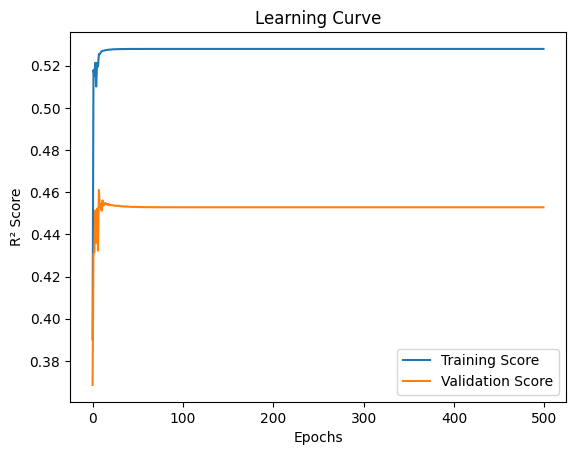

In [2]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Step 1: Load and Preprocess Data
# 加载糖尿病数据集
data = load_diabetes()
X, y = data.data, data.target

# 数据划分为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 标准化数据
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Step 2: Define Model
# 使用带正则化的岭回归模型 (等价于 LinearRegression + L2 regularization)
model = Ridge(alpha=0.1, max_iter=1, solver='sag', random_state=42)

# Step 3: Train Model and Record Scores
train_scores = []
val_scores = []

for epoch in range(1, 501):  # 模拟500个迭代
    # 创建临时模型模拟逐步训练过程
    temp_model = Ridge(alpha=0.1, max_iter=epoch, solver='sag', random_state=42)
    temp_model.fit(X_train, y_train)  # 训练模型

    # 计算训练分数和验证分数
    train_score = r2_score(y_train, temp_model.predict(X_train))
    val_score = r2_score(y_val, temp_model.predict(X_val))

    train_scores.append(train_score)
    val_scores.append(val_score)

    # 打印进度
    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Train Score = {train_score:.4f}, Val Score = {val_score:.4f}")

# Step 4: Plot Learning Curve
plt.plot(train_scores, label='Training Score')
plt.plot(val_scores, label='Validation Score')
plt.xlabel('Epochs')
plt.ylabel('R² Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

---

## **测试二**

实现多个机器学习模型在鸢尾花数据集上的训练和评估，并比较了模型的性能。具体步骤包括加载和预处理数据，定义K近邻、支持向量机和决策树模型，分别训练和评估这些模型，然后输出每个模型的准确率以进行比较。整个流程展示了如何在一个数据集上应用多种模型并选择效果最佳的模型。

### **选定的算法**
- **DatasetLoader （Basic.DataPart.DatasetLoader）**
    - 功能：用于加载数据集。
    - 主要职责：
        - 提供多种数据集加载方法（如 load_boston、load_diabetes 等）。
        - 从外部来源获取数据并返回特征矩阵和目标值。

- **DataPreprocessor （Basic.DataPart.DataPreprocessor）**
    - 功能：用于数据预处理。
    - 主要职责：
        - 处理缺失值（均值填充或删除）。
        - 数据标准化（Z-Score 标准化）。
        - 数据划分（如训练集和测试集）。
        - 额外功能（如数据采样、特征编码等）。

- **KNN （Models.KNN）**
    - 功能：实现 K 最近邻算法（KNN）。
    - 主要职责：
        - 根据欧氏距离计算最近的邻居。
        - 提供分类或回归功能。
        - 通过 fit 和 predict 方法完成训练和预测。
- **SVM （Models.SVM）**
    - 功能：实现支持向量机（SVM）。
    - 主要职责：
        - 提供线性和非线性分类功能。
        - 支持核方法（如 RBF 核、线性核）。
        - 提供模型训练（fit）和预测（predict）。

- **DecisionTree （Models.DecisionTree）**
    - 功能：实现决策树算法。
    - 主要职责：
        - 支持分类或回归任务。
        - 提供特征选择和树形结构的分裂功能。
        - 提供模型训练和预测功能。

- **ModelEvaluator （Basic.Model.ModelEvaluator）**
    - 功能：用于模型评估。
    - 主要职责：
        - 计算分类或回归性能指标，如准确率（Accuracy）、精确率（Precision）、召回率（Recall）、F1 分数等。
        - 提供混淆矩阵绘制和其他评估工具。

### **1. 加载和预处理数据：**
- 使用 DatasetLoader 类加载鸢尾花数据集。
- 使用 DataPreprocessor 类处理数据，包含处理缺失值、标准化数据，并将数据集划分为训练集和测试集。

### **2. 定义模型：**
- 定义了三个不同的模型：K近邻（KNN）模型、支持向量机（SVM）模型和决策树模型。

### **3.训练和评估模型：**
- 使用 ModelEvaluator 类对每个模型进行评估。
- 依次训练KNN、SVM和决策树模型，并预测测试集的结果。
- 评估每个模型的性能，记录指标（如准确率）。

### **4.比较模型结果：**
- 输出每个模型的评估结果，并比较它们的准确率。

In [1]:
from Basic.DataPart.DatasetLoader import DatasetLoader
from Basic.DataPart.DataPreprocessor import DataPreprocessor
from Models.KNN import KNN
from Models.SVM import SVM
from Models.DecisionTree import DecisionTree
from Basic.Model.ModelEvaluator import ModelEvaluator

# Step 1: Load and Preprocess Data
loader = DatasetLoader()
X, y = loader.load('iris')  # 加载鸢尾花数据集

preprocessor = DataPreprocessor()
X = preprocessor.handle_missing_values(X, strategy='mean')  # 处理缺失值
X = preprocessor.standardize(X)  # 标准化数据
X_train, X_test, y_train, y_test = preprocessor.train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define Models
knn_model = KNN(n_neighbors=5)  # KNN 模型
svm_model = SVM(kernel='rbf', C=1.0)  # SVM 模型
tree_model = DecisionTree(max_depth=5)  # 决策树模型

# Step 3: Train and Evaluate Models
evaluator = ModelEvaluator()

# KNN
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_metrics = evaluator.evaluate(y_test, knn_pred)
print("KNN Metrics:", knn_metrics)

# SVM
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_metrics = evaluator.evaluate(y_test, svm_pred)
print("SVM Metrics:", svm_metrics)

# Decision Tree
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_metrics = evaluator.evaluate(y_test, tree_pred)
print("Decision Tree Metrics:", tree_metrics)

# Step 4: Compare Results
print("\nComparison of Models:")
print("KNN Accuracy:", knn_metrics['accuracy'])
print("SVM Accuracy:", svm_metrics['accuracy'])
print("Decision Tree Accuracy:", tree_metrics['accuracy'])

KNN Metrics: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}
支持向量的数量: 11
支持向量的数量: 11
支持向量的数量: 37
SVM Metrics: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}
Decision Tree Metrics: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}

Comparison of Models:
KNN Accuracy: 1.0
SVM Accuracy: 1.0
Decision Tree Accuracy: 1.0


### **与sklearn的比较**

KNN Metrics:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000

SVM Metrics:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000

DecisionTree Metrics:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000


Model Comparison:
KNN: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}
SVM: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}
DecisionTree: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}


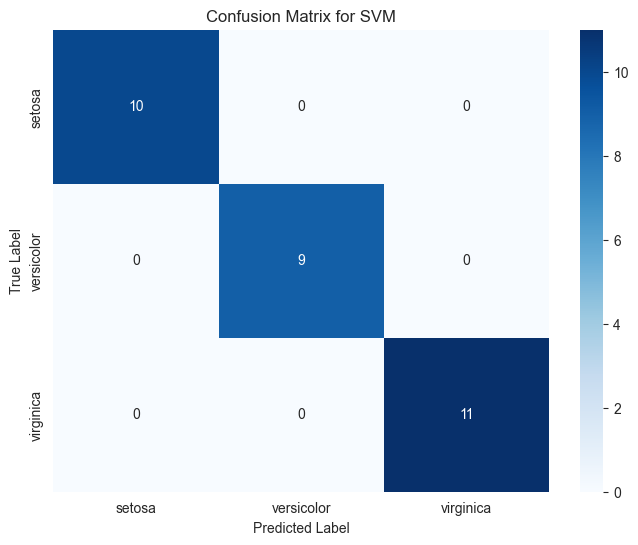

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and Preprocess Data
# 加载鸢尾花数据集
data = load_iris()
X, y = data.data, data.target

# 数据划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Define Models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', C=1.0, probability=True),
    "DecisionTree": DecisionTreeClassifier(max_depth=5, random_state=42)
}

# Step 3: Train and Evaluate Models
results = {}

for name, model in models.items():
    # 训练模型
    model.fit(X_train, y_train)

    # 预测结果
    y_pred = model.predict(X_test)

    # 计算指标
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # 存储结果
    results[name] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }

    # 打印结果
    print(f"{name} Metrics:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}\n")

# Step 4: Compare Results
print("\nModel Comparison:")
for name, metrics in results.items():
    print(f"{name}: {metrics}")

# Step 5: Confusion Matrix for Best Model (Optional)
# 以 SVM 为例
best_model = models["SVM"]
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM')
plt.show()


---

## **测试三**

加载鸢尾花数据集，进行预处理和标准化，然后使用PCA进行降维。然后定义并训练一个多分类逻辑回归模型，对模型性能进行评估，并可视化降维结果。

### **选定的算法**
- 逻辑回归（LogisticRegression.py） - 用于分类任务。
- PCA（PCA.py） - 用于降维。
- 神经网络（NeuralNetwork.py） - 用于更复杂的分类或回归任务。

### **1. 加载和预处理数据：**
- 从鸢尾花数据集中加载数据。
- 处理数据中的缺失值并标准化数据。
- 将数据集划分为训练集和测试集，并将目标变量转换为整数类型。

### **2. 主成分分析（PCA）降维：**
- 将数据降维到两个主成分，以减少特征的维度。

### **3. 定义和训练逻辑回归模型：**
- 使用降维后的数据训练一个多分类逻辑回归模型。
- 对测试集进行预测，并评估模型性能。

### **4. 评估模型性能：**
- 使用评估器计算模型的性能指标，并输出结果。

### **5. 可视化PCA结果（可选）：**
- 绘制PCA后的数据分布图，以观察数据在降维后在主成分空间的分布情况。

Epoch 0, Cost: 1.089233
Epoch 50, Cost: 0.798858
Epoch 100, Cost: 0.684855
Epoch 150, Cost: 0.630794
Epoch 200, Cost: 0.601111
Epoch 250, Cost: 0.583162
Epoch 300, Cost: 0.571586
Epoch 350, Cost: 0.563776
Epoch 400, Cost: 0.558329
Epoch 450, Cost: 0.554429
Logistic Regression Metrics: {'accuracy': 0.9, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}


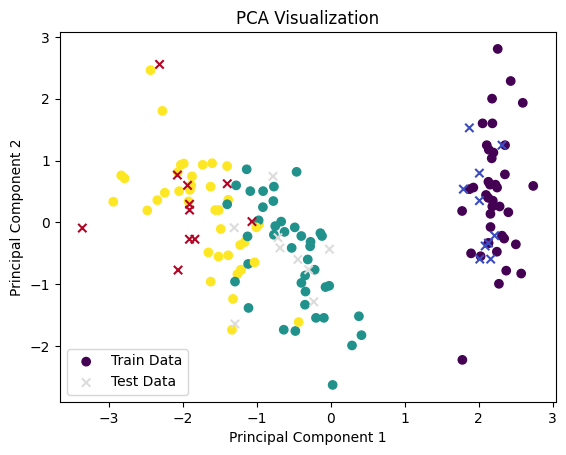

In [1]:
from Basic.DataPart.DatasetLoader import DatasetLoader
from Basic.DataPart.DataPreprocessor import DataPreprocessor
from Models.LogisticRegression import LogisticRegression
from Models.PCA import PCA
from Basic.Model.ModelEvaluator import ModelEvaluator
import matplotlib.pyplot as plt
import numpy as np
# Step 1: Load and Preprocess Data
loader = DatasetLoader()
X, y = loader.load('iris')  # 加载鸢尾花数据集

preprocessor = DataPreprocessor()
X = preprocessor.handle_missing_values(X, strategy='mean')  # 处理缺失值
X = preprocessor.standardize(X)  # 标准化数据
X_train, X_test, y_train, y_test = preprocessor.train_test_split(X, y, test_size=0.2, random_state=42)
# 转换 y 数据类型
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
# Step 2: Dimensionality Reduction with PCA
pca = PCA(n_components=2)  # 将数据降维到 2 个主成分
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 3: Define Logistic Regression Model
logistic_model = LogisticRegression(
    learning_rate=0.01,
    epochs=500,  # 使用 epochs 代替 max_iterations
    regularization='l2',
    lambda_param=0.1,
    multi_class='multinomial'
)

# Step 4: Train and Evaluate Logistic Regression Model
logistic_model.fit(X_train_pca, y_train)
logistic_pred = logistic_model.predict(X_test_pca)

evaluator = ModelEvaluator()
logistic_metrics = evaluator.evaluate(y_test, logistic_pred)
print("Logistic Regression Metrics:", logistic_metrics)

# Step 5: Visualize PCA Result (Optional)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', label='Train Data')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='coolwarm', marker='x', label='Test Data')
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

### **与sklearn的比较**

Logistic Regression Metrics:
  Accuracy: 0.9000
  Precision: 0.9014
  Recall: 0.9000
  F1 Score: 0.8992


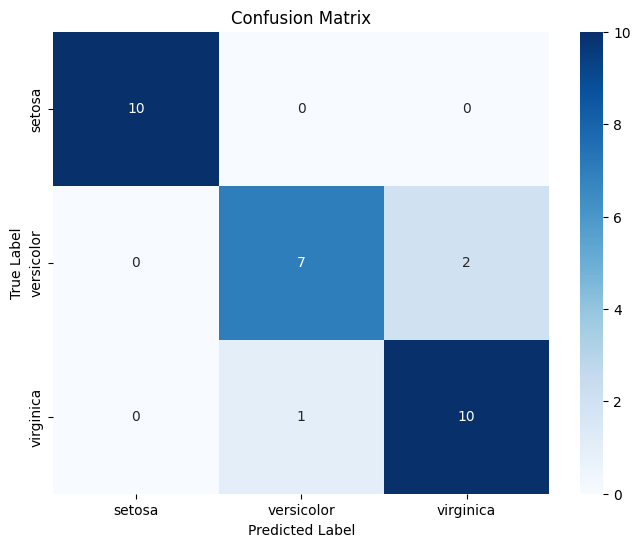

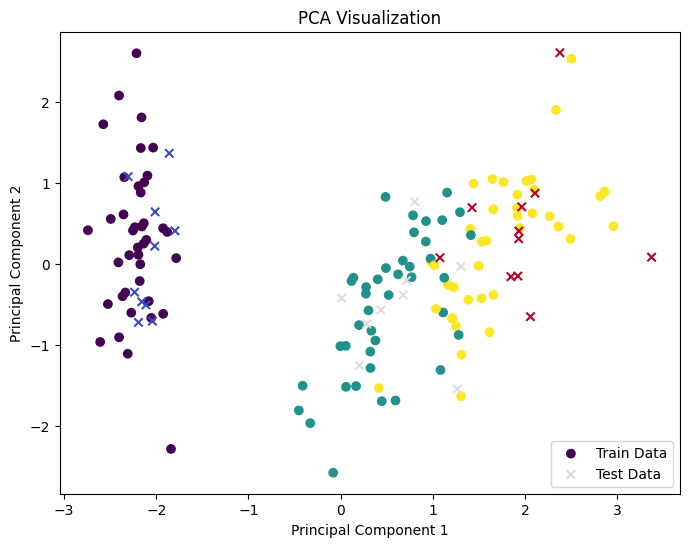

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and Preprocess Data
# 加载鸢尾花数据集
data = load_iris()
X, y = data.data, data.target

# 数据划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 标准化数据
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Dimensionality Reduction with PCA
pca = PCA(n_components=2)  # 降维到 2 个主成分
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 3: Define and Train Logistic Regression Model
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, random_state=42)
logistic_model.fit(X_train_pca, y_train)

# Step 4: Evaluate the Model
y_pred = logistic_model.predict(X_test_pca)

# 计算分类性能指标
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Logistic Regression Metrics:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")

# Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Step 6: Visualize PCA Result
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', label='Train Data')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='coolwarm', marker='x', label='Test Data')
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()